# Package and Prep

In [ ]:
# Installing package
!pip install opencv-python

# https://docs.opencv.org/4.x/dd/d49/tutorial_py_contour_features.html for reference


In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import glob
import os

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Mengambil semua file json di foldernya

In [ ]:
# Semua kontur latih

# Pindahin ke directory yang bener
os.chdir('/content/gdrive/MyDrive/DataTubesSdr')

file = glob.glob("*.json")
#print("\n".join(file))

semua_kontur = [[] for i in range (13)]

for data_ke in range(len(file)) :
  if file[data_ke][6] == '_' :
    with open('/content/gdrive/MyDrive/DataTubesSdr/'+file[data_ke]) as f:
      kontur = json.loads(f.read())
    bagian_pentingnya = kontur['shapes']
    semua_kontur[int(file[data_ke][5])-1].append(bagian_pentingnya)
  elif file[data_ke][6] == '0' :
    with open('/content/gdrive/MyDrive/DataTubesSdr/'+file[data_ke]) as f:
      kontur = json.loads(f.read())
    bagian_pentingnya = kontur['shapes']
    semua_kontur[9].append(bagian_pentingnya)
  elif file[data_ke][6] == '1' :
    with open('/content/gdrive/MyDrive/DataTubesSdr/'+file[data_ke]) as f:
      kontur = json.loads(f.read())
    bagian_pentingnya = kontur['shapes']
    semua_kontur[10].append(bagian_pentingnya)
  elif file[data_ke][6] == '2' :
    with open('/content/gdrive/MyDrive/DataTubesSdr/'+file[data_ke]) as f:
      kontur = json.loads(f.read())
    bagian_pentingnya = kontur['shapes']
    semua_kontur[11].append(bagian_pentingnya)
  elif file[data_ke][6] == '3' :
    with open('/content/gdrive/MyDrive/DataTubesSdr/'+file[data_ke]) as f:
      kontur = json.loads(f.read())
    bagian_pentingnya = kontur['shapes']
    semua_kontur[12].append(bagian_pentingnya)


In [ ]:
semua_kontur

[[[{'label': 'ayam',
    'points': [[1233.3333333333333, 221.2121212121212],
     [1240.6060606060605, 213.63636363636363],
     [1260.0, 208.48484848484847],
     [1263.6363636363635, 209.99999999999997],
     [1269.6969696969695, 213.9393939393939],
     [1276.6666666666665, 223.63636363636363],
     [1267.8787878787878, 230.30303030303028],
     [1266.3636363636363, 236.66666666666666],
     [1261.5151515151515, 246.66666666666666],
     [1263.3333333333333, 251.81818181818178],
     [1263.3333333333333, 257.27272727272725],
     [1260.3030303030303, 263.6363636363636],
     [1257.8787878787878, 276.96969696969694],
     [1256.060606060606, 283.6363636363636],
     [1253.9393939393938, 285.45454545454544],
     [1244.8484848484848, 283.93939393939394],
     [1244.5454545454545, 290.30303030303025],
     [1243.9393939393938, 293.93939393939394],
     [1238.181818181818, 299.6969696969697],
     [1235.7575757575758, 302.1212121212121],
     [1229.6969696969695, 307.27272727272725],
  

In [ ]:
# Pindahin ke directory yang bener
os.chdir('/content/gdrive/MyDrive/DataTubesSdr/Data_uji')

file = glob.glob("*.json")
#print("\n".join(file))

semua_kontur_uji = [[] for i in range (13)]

for data_ke in range(len(file)) :
  if file[data_ke][3] == 'a' :
    with open(file[data_ke]) as f:
      kontur = json.loads(f.read())
    bagian_pentingnya = kontur['shapes']
    if file[data_ke][5] == '0' :
      semua_kontur_uji[9].append(bagian_pentingnya)

    elif file[data_ke][5] == '1' :
      semua_kontur_uji[10].append(bagian_pentingnya)

    elif file[data_ke][5] == '2' :
      semua_kontur_uji[11].append(bagian_pentingnya)

    elif file[data_ke][5] == '3' :
      semua_kontur_uji[12].append(bagian_pentingnya)

  else :
    with open(file[data_ke]) as f:
      kontur = json.loads(f.read())
    bagian_pentingnya = kontur['shapes']
    semua_kontur_uji[int(file[data_ke][3])-1].append(bagian_pentingnya)

In [ ]:
semua_kontur_uji


[[[{'label': 'broiler',
    'points': [[645.1327433628318, 560.5486725663717],
     [652.2123893805309, 561.433628318584],
     [657.9646017699114, 555.2389380530974],
     [660.6194690265486, 560.1061946902655],
     [672.1238938053096, 557.8938053097346],
     [684.0707964601769, 555.2389380530974],
     [690.7079646017698, 541.9646017699115],
     [699.9999999999999, 543.7345132743363],
     [702.2123893805309, 551.6991150442478],
     [707.9646017699114, 554.7964601769912],
     [709.7345132743362, 546.3893805309735],
     [712.3893805309734, 536.6548672566372],
     [715.9292035398229, 526.4778761061947],
     [719.4690265486724, 517.1858407079646],
     [719.4690265486724, 513.2035398230089],
     [711.504424778761, 524.2654867256638],
     [715.9292035398229, 516.7433628318585],
     [715.4867256637167, 509.6637168141593],
     [717.2566371681415, 505.6814159292035],
     [715.0442477876105, 494.17699115044246],
     [707.9646017699114, 491.5221238938053],
     [710.619469026548

# Luas area ayamnya

In [ ]:
rata_rata_luas = []

for hari in range(13) :
  luas = 0
  banyak_ayam_total = 0

  for frame in range(len(semua_kontur[hari])) :
    banyak_ayam = len(semua_kontur[hari][frame])
    banyak_ayam_total = banyak_ayam_total + banyak_ayam

    for ayam_ke in range(banyak_ayam) :
      untuk_luas = np.array(semua_kontur[hari][frame][ayam_ke]['points'])
      untuk_luas = (np.rint(untuk_luas)).astype(int)
      luas = luas + cv.contourArea(untuk_luas)

  rata_rata_luas.append(luas/banyak_ayam_total)

rata_rata_luas = np.array(rata_rata_luas)

In [ ]:
rata_rata_luas

array([11655.17006803, 14410.22222222, 16487.47142857, 13160.99410029,
       15675.35096154, 19261.19594595, 20350.90298507, 21560.14285714,
        8029.83333333,  7120.39473684, 10254.34375   ,  9359.23333333,
        9364.23333333])

In [ ]:
rata_rata_luas_uji = []

for hari in range(13) :
  luas = 0
  banyak_ayam_total = 0

  for frame in range(len(semua_kontur_uji[hari])) :
    banyak_ayam = len(semua_kontur_uji[hari][frame])

    banyak_ayam_total = banyak_ayam_total + banyak_ayam

    for ayam_ke in range(banyak_ayam) :
      untuk_luas = np.array(semua_kontur_uji[hari][frame][ayam_ke]['points'])
      untuk_luas = (np.rint(untuk_luas)).astype(int)
      luas = luas + cv.contourArea(untuk_luas)

  rata_rata_luas_uji.append(luas/banyak_ayam_total)

rata_rata_luas_uji = np.array(rata_rata_luas_uji)

In [ ]:
rata_rata_luas_uji

array([ 3949.43627451,  4155.06097561,  4725.61304348,  4971.24537037,
        6610.2029703 , 42817.99657534, 47024.21850394, 45804.91612903,
       52301.90521327, 24771.65      , 27589.1875    , 30233.19026549,
       29834.96039604])

# Regresi linear

In [ ]:
file_path = '/content/gdrive/MyDrive/DataTubesSdr/Data Berat Ayam.xlsx'
data_berat_badan_ayam = pd.read_excel(file_path,sheet_name='Data Bobot', header = 0)[:15]


## Regresi Usia-Berat


Karena data di video bukan data yang diberikan di tabel, aproksimasi dulu dengan regresi agak dapat diintrapolasikan.

In [ ]:
berat_badan_ayam = data_berat_badan_ayam['Berat (kg)']
umur_ayam_hari =  data_berat_badan_ayam['Hari']
berat_badan_ayam = (np.array(berat_badan_ayam).reshape(-1,1)).astype(float)
umur_ayam_hari = (np.array(umur_ayam_hari).reshape(-1,1)).astype(float)

# Normalisasi
#berat_badan_ayam = ( berat_badan_ayam - np.average(berat_badan_ayam) )/ np.average(berat_badan_ayam)
#umur_ayam_hari = ( umur_ayam_hari - np.average(umur_ayam_hari) )/ np.average(umur_ayam_hari)

In [ ]:
def jadikan_input_matriks(input,derajat) :
  banyak_data = len(input)
  Matriks_input = np.zeros([banyak_data,derajat+1])
  Matriks_input[:,0] = 1.0
  for i in range(1,derajat+1) :
    Matriks_input[:,i] = np.power(input,i)
  return(Matriks_input)

def fit_polynomial(Matriks_input, target) :
  XtX = Matriks_input.T @ Matriks_input
  XtXinv = np.linalg.inv(XtX)
  koefisien = XtXinv @ Matriks_input.T @ target
  return koefisien

### Loose One Out Cross Validation (LOOCV) Untuk model linear

0 [0] 0.9761611887896183 16.477391050566524 [[0.49780955]]
1 [1] 0.9560305944234847 20.38822438389985 [[0.080571]]
2 [2] 0.9633540619168779 19.87822438389985 [[0.08363446]]
3 [3] 0.9732790900161928 19.735440987355396 [[0.24934235]]
4 [4] 0.9643668381172736 19.444691050566526 [[0.01628631]]
5 [5] 0.9654664376179787 19.433407999719062 [[0.08437124]]
6 [6] 0.9654995359705456 19.356855336280802 [[0.0825183]]
7 [7] 0.964644990794435 19.240891050566514 [[0.03852198]]
8 [8] 0.9665942758347698 19.166891050566516 [[0.12099558]]
9 [9] 0.9637743360891454 18.948891050566516 [[0.03455868]]
10 [10] 0.9641594919194283 18.823891050566516 [[0.09036329]]
11 [11] 0.9636115430449963 18.876891050566524 [[0.05158782]]
12 [12] 0.9629430471939482 18.6776688283443 [[0.0890066]]
13 [13] 0.9629354572059552 18.577891050566524 [[0.1194536]]
14 [14] 0.9675031578202336 18.40789105056652 [[0.23428175]]


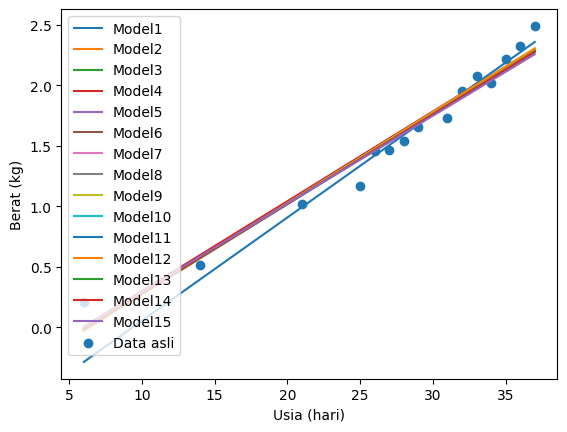

In [ ]:
model_linear_terbaik = None

LOO = LeaveOneOut()
for i, (train_index, test_index) in enumerate(LOO.split(umur_ayam_hari)) :
  train_data = []
  train_target = []
  test_data = [umur_ayam_hari[test_index[0]]]
  test_target = [berat_badan_ayam[test_index[0]]]
  for index in train_index :
    train_data.append(umur_ayam_hari[index])
    train_target.append(berat_badan_ayam[index])

  test_reg = LinearRegression().fit(train_data, train_target)

  # Cek Loss RMSE-nya berapa

  koefisien_test_reg = test_reg.coef_[0]
  intercept_test_reg = test_reg.intercept_[0]

  error_dalam = (((train_target[0] - test_reg.predict(train_data))).sum()**2)**(0.5)
  error_luar = ((test_target[0] - test_reg.predict(test_data))**2)**(0.5)

  # Mau dipakai model saat i = 4
  if i == 4 :
    model_linear_terbaik = test_reg

  print(i, test_index, test_reg.score(train_data, train_target),error_dalam,error_luar)

  # Plotting
  absis = np.linspace(6,37,50)
  ordinat = test_reg.predict(absis.reshape(-1,1))
  plt.plot(absis,ordinat, label ='Model'+str(i+1))

plt.scatter(umur_ayam_hari,berat_badan_ayam, label = 'Data asli')
plt.xlabel('Usia (hari)')
plt.ylabel('Berat (kg)')
plt.legend()

### Loose One Out Cross Validation (LOOCV) Untuk model kuadrat

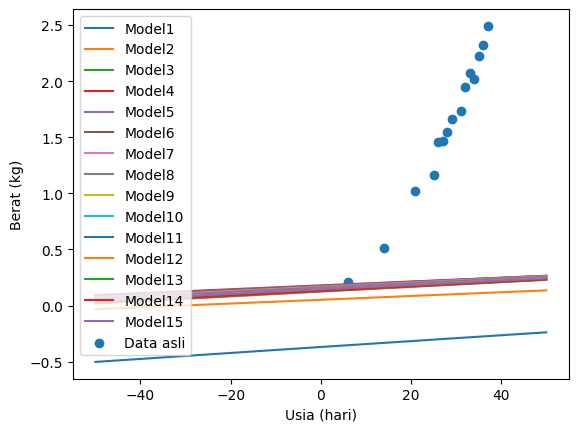

In [ ]:
# Cek kenapa plotnya aneh

model_kuadrat_terbaik = None

berat_badan_ayam = (np.array(berat_badan_ayam).reshape(-1,1)).astype(float)
umur_ayam_hari = (np.array(umur_ayam_hari).reshape(-1,1)).astype(float)

LOO = LeaveOneOut()
for i, (train_index, test_index) in enumerate(LOO.split(umur_ayam_hari)) :
  train_data_2 = []
  train_target_2 = []
  test_data_2 = [umur_ayam_hari[test_index[0]]]
  test_target_2 = [berat_badan_ayam[test_index[0]]]
  for index in train_index :
    train_data_2.append(umur_ayam_hari[index][0]**2)
    train_target_2.append(berat_badan_ayam[index][0]**2)

  train_data_2_matriks = jadikan_input_matriks(train_data_2,2)
  koefisien = fit_polynomial(train_data_2_matriks, train_target)

  # Cek Loss MSE-nya berapa

  #print(i, test_index, regresi_kuadrat.score(train_data_2, train_target_2),error_dalam**(0.5), error_luar**(0.5))

  # Plotting
  absis_1 = np.linspace(-50,50,200)
  ordinat_1 = jadikan_input_matriks(absis_1,2) @ koefisien
  plt.plot(absis_1,ordinat_1, label ='Model'+str(i+1))

plt.scatter(umur_ayam_hari,berat_badan_ayam, label = 'Data asli')
plt.xlabel('Usia (hari)')
plt.ylabel('Berat (kg)')
plt.legend()

### Loose One Out Cross Validation (LOOCV) Untuk model eksponensial

0 [0] 0.3377236472456048 16.47739105056652 [[1.34681805]]
1 [1] 0.2977069330390639 20.38822438389985 [[1.02057338]]
2 [2] 0.27498881139219744 19.878224383899852 [[0.46749392]]
3 [3] 0.2747921976466007 19.735440987355396 [[0.31265773]]
4 [4] 0.28096521759051585 19.44469105056652 [[0.00263642]]
5 [5] 0.28137823154079045 19.43340799971906 [[0.01483185]]
6 [6] 0.2845257643028104 19.35685533628081 [[0.09773803]]
7 [7] 0.29046132245738376 19.240891050566518 [[0.22318364]]
8 [8] 0.2947460572117625 19.166891050566523 [[0.30025286]]
9 [9] 0.3108444201847226 18.948891050566523 [[0.53001953]]
10 [10] 0.31973931577102266 18.823891050566516 [[0.6475138]]
11 [11] 0.3061226108275563 18.876891050566524 [[0.54329022]]
12 [12] 0.29612669260902835 18.6776688283443 [[0.63609581]]
13 [13] 0.23940901204471177 18.57789105056652 [[0.45135734]]
14 [14] 0.27013640850698006 18.40789105056652 [[2.11385759]]


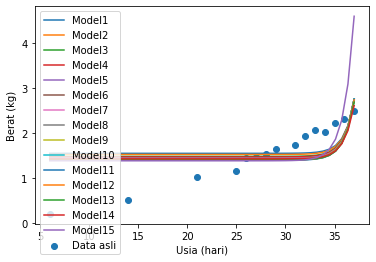

In [ ]:
model_eksponensial_terbaik = None

berat_badan_ayam = (np.array(berat_badan_ayam).reshape(-1,1)).astype(float)
umur_ayam_hari = (np.array(umur_ayam_hari).reshape(-1,1)).astype(float)
berat_badan_ayam_exp = np.exp(berat_badan_ayam)
umur_ayam_hari_exp = np.exp(umur_ayam_hari)

LOO = LeaveOneOut()
for i, (train_index, test_index) in enumerate(LOO.split(umur_ayam_hari)) :
  train_data_3 = []
  train_target_3 = []
  test_data_3 = [umur_ayam_hari_exp[test_index[0]]]
  test_target_3 = [berat_badan_ayam[test_index[0]]]
  for index in train_index :
    train_data_3.append(umur_ayam_hari_exp[index])
    train_target_3.append(berat_badan_ayam[index])

  regresi_eksponensial = make_pipeline(PolynomialFeatures(1),LinearRegression()).fit(train_data_3, train_target_3)

  # Cek Loss MSE-nya berapa

  error_dalam = (((train_target_3[0] - regresi_eksponensial.predict(train_data_3) ).sum())**2)
  error_luar = ((test_target_3[0] - regresi_eksponensial.predict(test_data_3)))**2

  # Mau dipakai model saat i = 13
  if i == 13 :
    model_eksponensial_terbaik = regresi_eksponensial

  print(i, test_index, regresi_eksponensial.score(train_data_3, train_target_3),error_dalam**(0.5), error_luar**(0.5))

  # Plotting
  absis_3 = np.linspace(6,37,50)
  absis_3_exp = np.exp(absis_3)
  ordinat_3 = regresi_eksponensial.predict(absis_3_exp.reshape(-1,1))
  plt.plot(absis_3,ordinat_3, label ='Model'+str(i+1))

plt.scatter(umur_ayam_hari,berat_badan_ayam, label = 'Data asli')
plt.xlabel('Usia (hari)')
plt.ylabel('Berat (kg)')
plt.legend()

## Regresi Luas-Berat


In [ ]:
tanggal_penting = np.linspace(11,23,13)
berat_penting = model_linear_terbaik.predict(tanggal_penting.reshape(-1,1))
rata_rata_luas_akar = np.power(rata_rata_luas,0.5)
rata_rata_luas_akar_uji = np.power(rata_rata_luas_uji,0.5)


reg_luas = LinearRegression().fit(rata_rata_luas.reshape(-1,1), berat_penting)
koefisien_luas = reg_luas.coef_[0][0]
intercept_luas = reg_luas.intercept_[0]
reg_luas.score(rata_rata_luas.reshape(-1,1), berat_penting)

0.17829738020189256

In [ ]:
reg_luas_akar = LinearRegression().fit(rata_rata_luas_akar.reshape(-1,1), berat_penting)
koefisien_luas_akar = reg_luas_akar.coef_[0][0]
intercept_luas_akar = reg_luas_akar.intercept_[0]
reg_luas_akar.score(rata_rata_luas_akar.reshape(-1,1), berat_penting)

0.21300664946877135

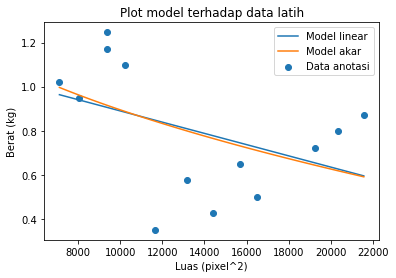

In [ ]:
luas_minimum = np.min(rata_rata_luas)
luas_maksimum = np.max(rata_rata_luas)
absis_luas = np.linspace(luas_minimum,luas_maksimum,50).reshape(-1,1)
ordinat_luas = reg_luas.predict(absis_luas)
ordinat_luas_akar = reg_luas_akar.predict(np.power(absis_luas,0.5))

plt.plot(absis_luas,ordinat_luas, label = 'Model linear')
plt.plot(absis_luas,ordinat_luas_akar, label = "Model akar")
plt.scatter(rata_rata_luas.reshape(-1,1), berat_penting, label = 'Data anotasi')
plt.xlabel('Luas (pixel^2)')
plt.ylabel('Berat (kg)')
plt.title('Plot model terhadap data latih')
plt.legend()

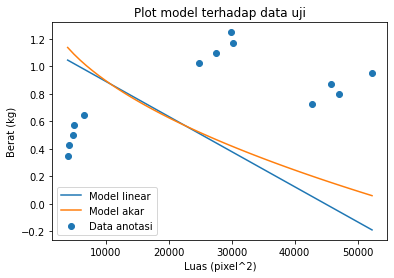

In [ ]:
luas_minimum_uji = np.min(rata_rata_luas_uji)
luas_maksimum_uji = np.max(rata_rata_luas_uji)
absis_luas_uji = np.linspace(luas_minimum_uji,luas_maksimum_uji,50).reshape(-1,1)
ordinat_luas_uji = reg_luas.predict(absis_luas_uji)
ordinat_luas_akar_uji = reg_luas_akar.predict(np.power(absis_luas_uji,0.5))

plt.plot(absis_luas_uji,ordinat_luas_uji, label = 'Model linear')
plt.plot(absis_luas_uji,ordinat_luas_akar_uji, label = "Model akar")
plt.scatter(rata_rata_luas_uji.reshape(-1,1), berat_penting, label = 'Data anotasi')
plt.xlabel('Luas (pixel^2)')
plt.ylabel('Berat (kg)')
plt.title('Plot model terhadap data uji')
plt.legend()

In [ ]:
# Error RMSE-nya

error_luas_linear_latih = (((berat_penting - reg_luas.predict(rata_rata_luas.reshape(-1,1))).sum())**2)**(0.5)
error_luas_akar_latih =  (((berat_penting - reg_luas_akar.predict(rata_rata_luas_akar.reshape(-1,1))).sum())**2)**(0.5)
error_luas_linear_uji = (((berat_penting - reg_luas.predict(rata_rata_luas_uji.reshape(-1,1))).sum())**2)**(0.5)
error_luas_akar_uji =  (((berat_penting - reg_luas_akar.predict(rata_rata_luas_akar_uji.reshape(-1,1))).sum())**2)**(0.5)
print("RMSE model data latih linear", error_luas_linear_latih)
print("RMSE model data latih akar", error_luas_akar_latih)
print("RMSE model data uji linear", error_luas_linear_uji)
print("RMSE model data uji akar", error_luas_akar_uji)

RMSE model data latih linear 1.1102230246251565e-16
RMSE model data latih akar 7.771561172376096e-16
RMSE model data uji linear 3.78285389367585
RMSE model data uji akar 2.541182932882732
